<a href="https://colab.research.google.com/github/juliowaissman/github-mlflow-dagshub-colab/blob/main/DAGsHub_x_MLflow_x_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <img src="https://dagshub.com/nirbarazida/images/raw/6d13128f89fd7c9d66e8e01282cd5a35a41a82e7/colab-mlflow/mlflow-dagshub-ten.png" height=""/>
</center>

<center><h1>Log Tensorflow's model to an MLflow server on DAGsHub </h1>

<h1>Colab Environment</h1></center>

---

## Hello and Welcome to DAGsHub! 👋 

We are very excited to have you on [DAGsHub](https://dagshub.com) and can't wait to see what remarkable projects you will create and share with the Data Science community. 
<br>


The primary goal of this notebook is to showcase how to **live-log a Tensorflow model to an MLflow server on DAGsHub**.

<u>**Our workflow will be as follow**</u>:
- Open a new project on DAHsHub, to which an MLflow server is automatically connected.
- Configure MLflow locally with the repository's MLflow server. 
- Train a reasnet50 model from Tensorflow using transfer learning on the MNIST data set. 
- See the training progress (LIVE) on DAGsHub under the Experiment Tab with graph visualization.


<img src="https://dragonballz.co.il/wp-content/uploads/2020/12/discord-logo.jpg" height="23"/> [Discord Channel](https://discord.com/channels/698874030052212737/698874030572437526) | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Linkedin.svg/1200px-Linkedin.svg.png" height="23"/> [LinkedIn](https://www.linkedin.com/company/dagshub/) | <img src="https://help.twitter.com/content/dam/help-twitter/brand/logo.png" height="25"/> [Twitter](https://twitter.com/TheRealDAGsHub) | <img src="https://res-2.cloudinary.com/crunchbase-production/image/upload/c_lpad,f_auto,q_auto:eco/plwmuai9t3okgwbuhkho" height="30"/> [DAGsHub](https://dagshub.com) | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/Octicons-mark-github.svg/1200px-Octicons-mark-github.svg.png" height="25"/> [GitHub](https://github.com/DAGsHub) | <img src="https://miro.medium.com/max/4000/0*4Z6mwORGhtSAgeQ2.png" height="30"/> [Tensorflow](https://www.tensorflow.org/)



# Change the Runtime to GPU

On the top nav-bar, choose `Runtme`, click on `change runtime type`, and under `Hardware accelerator` choose GPU.


# Create a Repository on DAGsHub 🏗 

- We will start by [creating a new repository](https://dagshub.com/repo/create) on DAGsHub.
- Fill in the repository name as 'tracking-example and make sure that the repository is public. Then click the 'Create Repository' button at the bottom. 


<center>
<img src="https://dagshub.com/nirbarazida/images/raw/22ffadf74508f2f8626a528ea55f0fbf3d43f941/colab-mlflow/create-a-repo.png" height="700"/> 
</center>

<center><b>Congratulations</b> - you created your first DAGsHub repository! 🥳 </center>



# Configure MLflow 🧐

In [1]:
import requests
from getpass import getpass
import datetime

**Set Environment Variables**


In [2]:
#@title Enter the repository name for the project:

REPO_NAME= "hola-mundo" #@param {type:"string"}

In [3]:
#@title Enter the repository name for the project:

REPO_OWNER= "juliowaissman" #@param {type:"string"}

In [4]:
#@title Enter the username of your DAGsHub account:

USER_NAME = "juliowaissman" #@param {type:"string"}

**Initialize MLflow**

In [5]:
!pip install mlflow --quiet

import mlflow
import os
from getpass import getpass

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 83.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00


**Set Local Configurations**

Under the [Token tab](https://dagshub.com/user/settings/tokens) in the user setting, copy the default token and use it here.

In [7]:
os.environ['MLFLOW_TRACKING_USERNAME'] = 'juliowaissman'
os.environ['MLFLOW_TRACKING_PASSWORD'] = getpass('Enter your DAGsHub access token or password: ')

mlflow.set_tracking_uri(f'https://dagshub.com/{REPO_OWNER}/{REPO_NAME}.mlflow')

Enter your DAGsHub access token or password: ··········


# Model 🪐

In [8]:
import tensorflow as tf
import IPython
import numpy as np
import matplotlib.pyplot as plt

## Import the Data Files

![](https://camo.githubusercontent.com/01c057a753e92a9bc70b8c45d62b295431851c09cffadf53106fc0aea7e2843f/687474703a2f2f692e7974696d672e636f6d2f76692f3051493378675875422d512f687164656661756c742e6a7067)

In [9]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


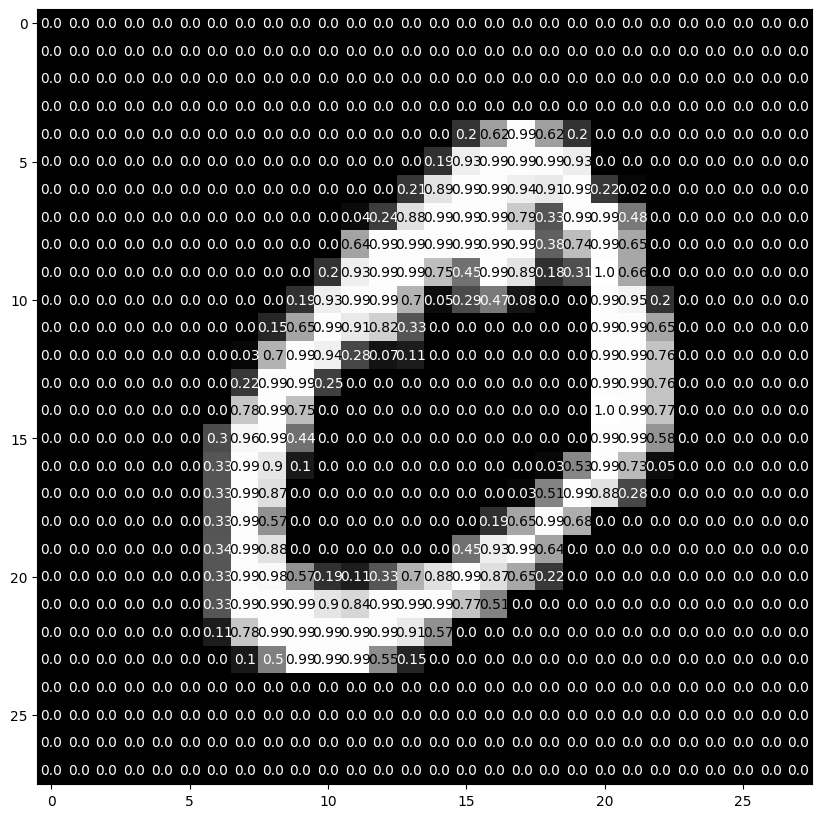

In [12]:
image = np.reshape(X_train[1], [28, 28])
image_array = np.asarray(image)
fig, ax = plt.subplots(figsize=(10, 15))
img = ax.imshow(image_array, cmap='gray')

for x in range(28):
    for y in range(28):
        value = round(image[y][x], 2)
        color = 'black' if value > 0.5 else 'white'
        ax.annotate(text=value, xy=(x, y), ha='center', va='center', color=color)

## Configure a Tensorflow Model

In [13]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Set MLflow Auto-Logging

In [15]:
 mlflow.tensorflow.autolog()
 mlflow.log_param("task",2)

2

## See the Experiment Results - LIVE! 📳

In this tab, you can see the results of the experiment while it's running!

**Notice**: To update the experiment status, simply go back to the "Experiment Tab" and reopen the top experiment in the table.

In [16]:
display(IPython.display.IFrame(f"https://dagshub.com/{REPO_OWNER}/{REPO_NAME}/experiments/#/",'100%',600))

## Train the Model

In [17]:
model.fit(X_train, y_train, batch_size= 32, validation_split=0.2, epochs=50,verbose=0)

1/1 [==============================] - 0s 73ms/step


2023/05/13 05:17:03 WARNING mlflow.utils.requirements_utils: Found jaxlib version (0.4.7+cuda11.cudnn86) contains a local version label (+cuda11.cudnn86). MLflow logged a pip requirement for this package as 'jaxlib==0.4.7' without the local version label to make it installable from PyPI. To specify pip requirements containing local version labels, please use `conda_env` or `pip_requirements`.
2023/05/13 05:17:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


# Finish Line 🏁

**Congratulations**  - You made it to the finish line! 🥳

In this section, we covered how to track fast.ai models with MLflow to DAGsHub servers. If you want to start fast with DAGsHub, this [notebook](https://colab.research.google.com/drive/1JJIwAH0TBSY49um5s2FD0GEA6bw3SKrd#scrollTo=XcU2y1F_Hyub) is for you.  <br><br>

More resources that can interest you:
- [DAGsHub Docs](https://dagshub.com/docs/).
- [Get Started Tutorial](https://dagshub.com/docs/getting-started/overview/).
- [DAGsHub Blog](https://dagshub.com/blog/).
- [FAQ](https://dagshub.com/docs/faq/).

<br>

We hope that this Tutorial was helpful and made the onboarding process easier for you. If you found an issue in the notebook, please [let us know](https://dagshub.com/DAGsHub-Official/DAGsHub-Issues/issues/). If you have any questions feel free to join our [Discord channel](https://discord.com/invite/9gU36Y6) and ask there. We can't wait to see what remarkable project you will create and share with the Data Science community!
<br><br>